In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_excel('dataset/Hyperspectral/Combind_H_canopy.xlsx')
print(f'Total sample {dataset.shape}')

Total sample (328, 189)


In [5]:
dataset.head()

,Day,PlantID,Treatment,Genotype,RWC,ETR,gsw,PhiPS2,Emm,514,...,975,978,981,983,986,989,992,995,997,1000
0,Day1,111,Mild stress,Star,70.701619,46.369003,0.052967,0.073338,0.745927,0.062881,...,0.518818,0.519179,0.515159,0.509742,0.500198,0.490246,0.478974,0.466020,0.466794,0.466752
1,Day1,112,Mild stress,Brightwell,73.375557,30.140169,0.119527,0.047671,1.556236,0.185620,...,0.463006,0.462499,0.460909,0.455054,0.447277,0.442703,0.431510,0.423773,0.429168,0.429066
2,Day1,113,Mild stress,Powderblue,69.199272,36.754659,0.036583,0.058134,0.502678,0.117938,...,0.569221,0.570507,0.568442,0.564118,0.555738,0.545801,0.536428,0.522799,0.524080,0.524045
3,Day1,114,Mild stress,Suziblue,70.498812,31.542745,0.024247,0.049890,0.331857,0.031432,...,0.501883,0.502461,0.499594,0.494314,0.484216,0.472529,0.462194,0.445263,0.446430,0.446390
4,Day1,115,Mild stress,Vernon,67.564802,81.418136,0.036947,0.128774,0.547557,0.061755,...,0.551251,0.553832,0.550637,0.546324,0.535134,0.521055,0.510470,0.489832,0.490154,0.490111


### Classwise sample

In [7]:
df_g=dataset.groupby(['Treatment'])

In [15]:
print('Sample size based on different condition')
print(df_g["Treatment"].count())
print()
df_g["RWC"].describe()


Sample size based on different condition
Treatment
Extreme stress    111
Mild stress       106
Well watered      111
Name: Treatment, dtype: int64



,count,mean,std,min,25%,50%,75%,max
Treatment,,,,,,,,
Extreme stress,111.0,65.530183,5.017119,51.534476,62.231029,64.630872,70.171852,75.020298
Mild stress,106.0,65.362168,4.890964,55.087181,61.964869,64.677262,70.172643,77.024009
Well watered,111.0,65.620958,4.728990,54.221502,62.792951,64.911429,69.881623,74.515476


In [8]:
high= dataset[(100.00>=dataset["RWC"]) & (dataset["RWC"]>90.00)]
print(f'sample in range 100-90% ={high.shape[0]} which is {(high.shape[0])/dataset.shape[0] *100}% of the dataset')

Medium= dataset[(90.00>=dataset["RWC"]) & (dataset["RWC"]>80.00)]
print(f'sample in range 90-80% ={Medium.shape[0]} which is {(Medium.shape[0])/dataset.shape[0] *100}% of the dataset')


low= dataset[(80.00>=dataset["RWC"]) & (dataset["RWC"]>50.00)]
print(f'sample in range 80-60% ={low.shape[0]} which is {(low.shape[0])/dataset.shape[0] *100}% of the dataset')

sample in range 100-90% =84 which is 16.470588235294116% of the dataset
sample in range 90-80% =292 which is 57.25490196078431% of the dataset
sample in range 80-60% =134 which is 26.27450980392157% of the dataset


In [23]:
dataset.groupby(['class'])['RWC'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
ES,170.0,80.553616,7.882405,59.273593,74.253347,78.966419,87.708333,92.023974
MS,171.0,84.482624,6.124304,63.950144,82.468549,85.059920,89.781197,93.383249
WW,169.0,86.283478,4.156886,77.356322,83.632320,86.844050,89.365438,93.254468


In [30]:
dataset[]

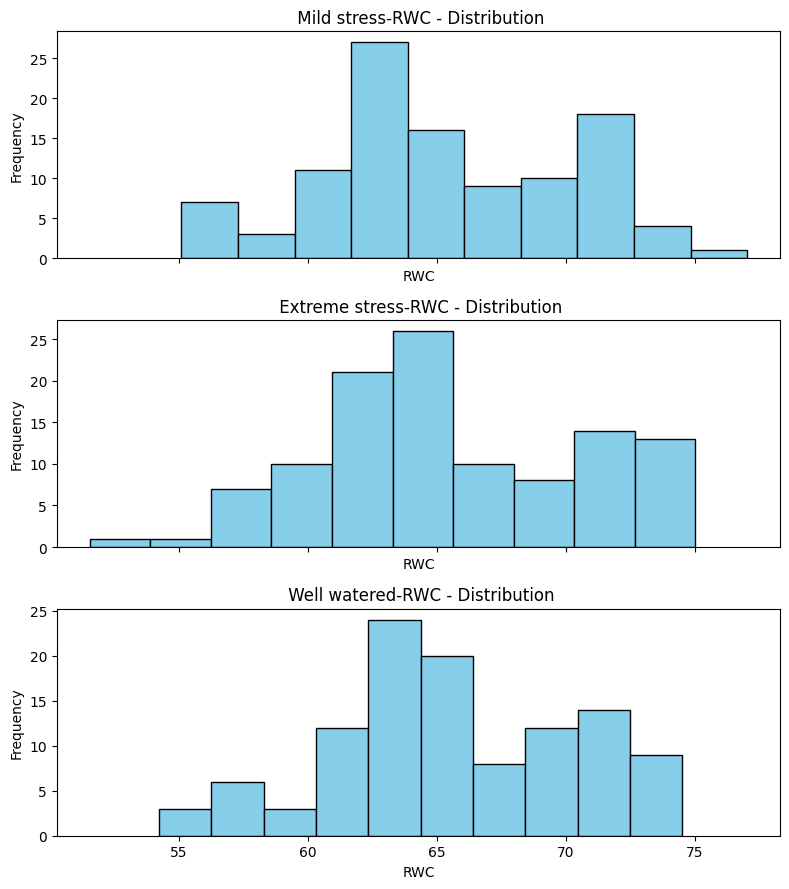

In [35]:
#visualization
column='Treatment'
unique_classes = dataset["Treatment"].unique()
feature='RWC'

num_classes = len(unique_classes)
fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 3 * num_classes), sharex=True)

for ax, class_value in zip(axes, unique_classes):
    if class_value=='Extreme stress':
        shift=0
    elif class_value=='Mild  stress':
        shift= 0
    else: 
        shift= 0
    class_df = dataset[dataset['Treatment'] == class_value]
    ax.hist(class_df[feature]-shift, bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f' {class_value}-{feature} - Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Spectra

In [31]:
gt=dataset.iloc[:,5]
reflec=dataset.iloc[:,34:]
print(f'Number of X {reflec.shape} and Y {gt.shape}')

Number of X (510, 448) and Y (510,)


Text(0, 0.5, 'Reflectance')

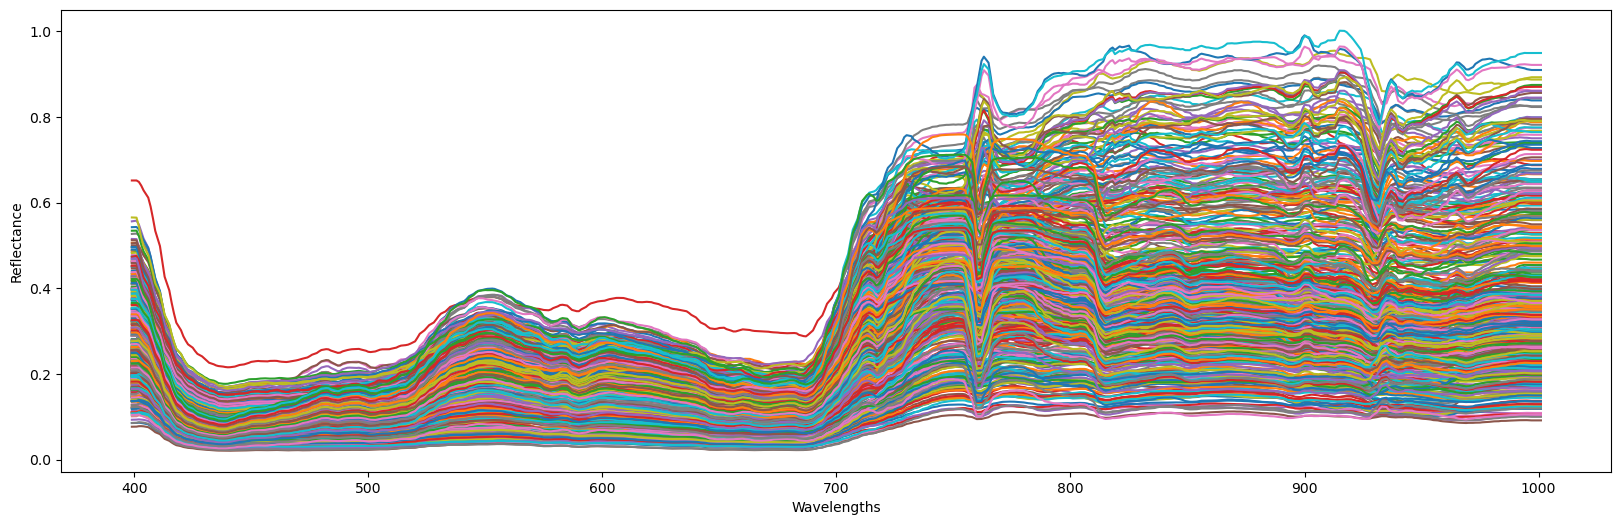

In [32]:
ax=reflec.iloc[:,:].T.plot(figsize=(20,6),legend=False)
ax.set_xlabel("Wavelengths")
ax.set_ylabel('Reflectance')

In [36]:
#helper function 
def transformation(r):
    return np.log(1/r)

def mean_center(data):
    new=data.copy()
    for i in range(data.shape[0]):
         new.iloc[i,:]= (data.iloc[i,:]-np.mean(data.iloc[i,:]))
    return new
        
def msc(input_data,reference=None):
    eps=np.finfo(np.float32).eps
    input_=np.array(input_data,dtype=np.float64)
    ref=[]
    sampleCount=int(len(input_))
    for i in range(input_data.shape[0]):
        input_[i,:]-=input_[i,:].mean()
    data_msc=input_data.copy()
    for i in range(input_.shape[0]):
        for j in range(0,sampleCount,10):
            ref.append(np.mean(input_[j:j+10],axis=0))
            fit=np.polyfit(ref[i],input_[i,:],1,full=True)
            data_msc.iloc[i,:]=(input_[i,:]-fit[0][1])/fit[0][0]
    
    return (data_msc)

In [38]:
#data transformation
x_1=transformation(reflec.loc[:,425:975])
x_2=msc(x_1)
x_3=mean_center(x_2)

Text(0.5, 1.0, 'preprocessed')

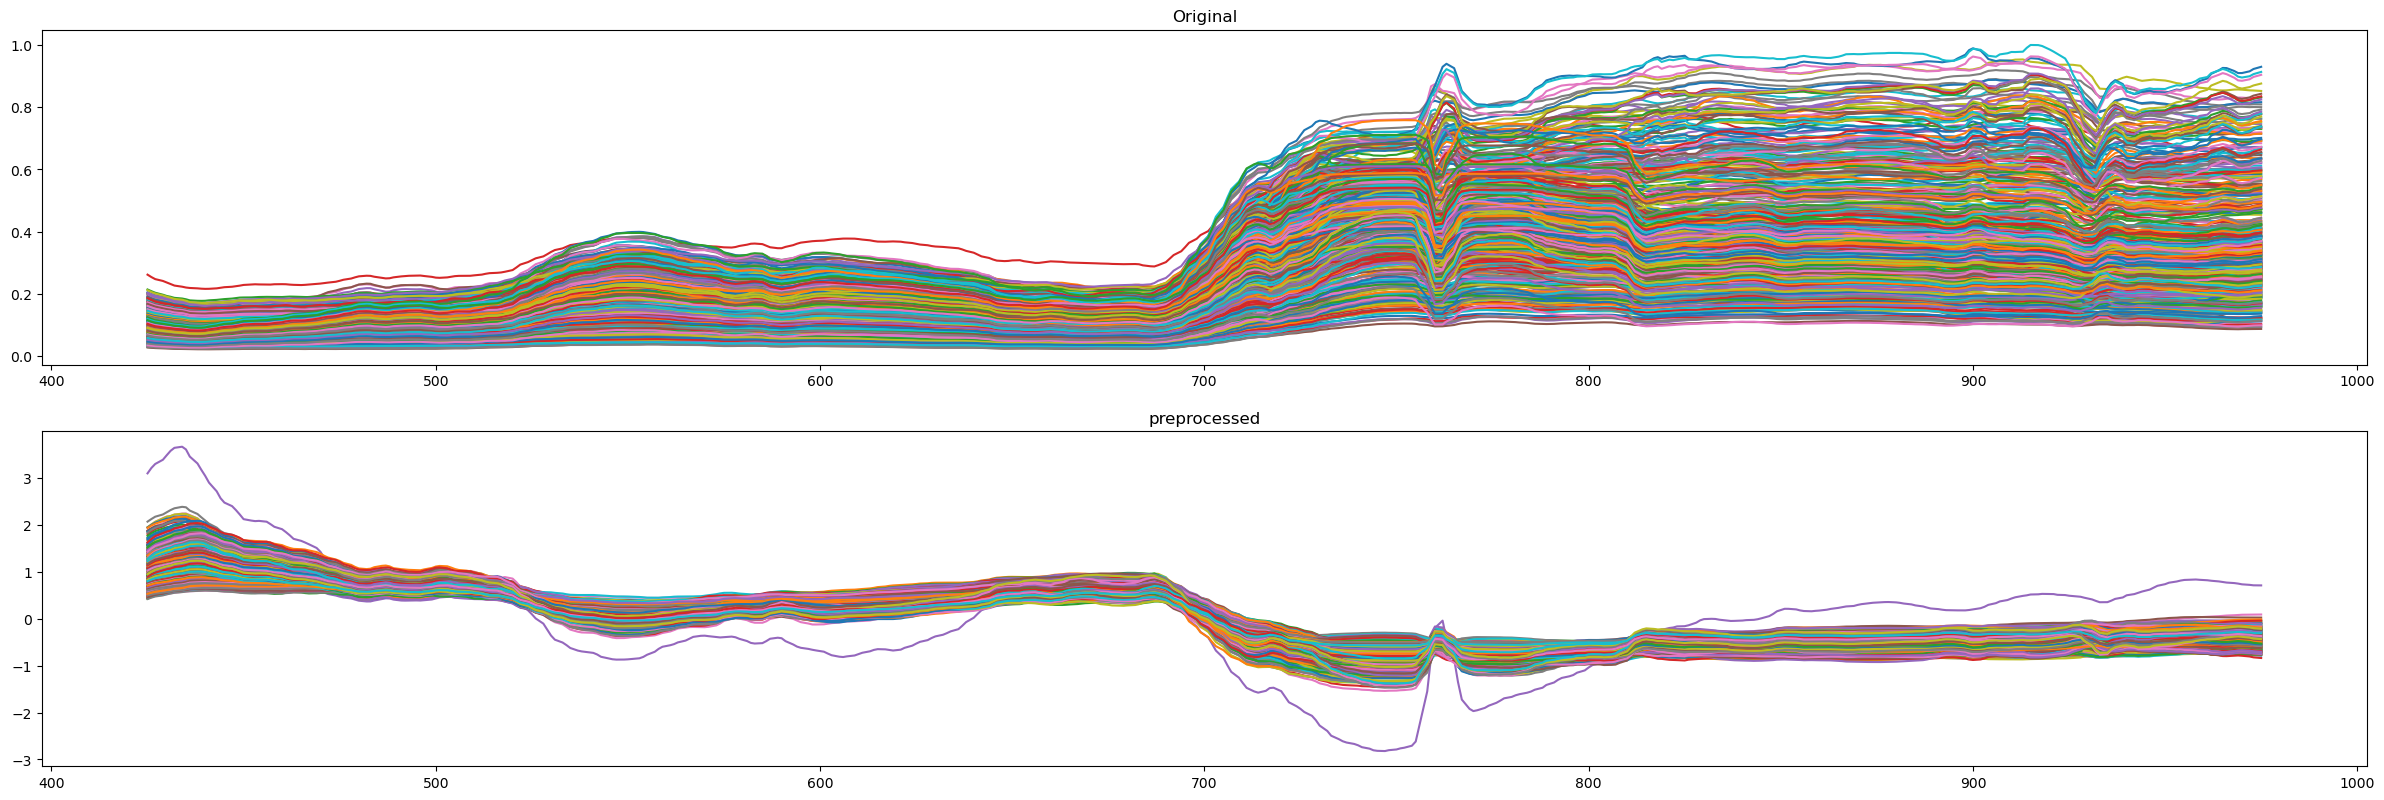

In [39]:
plt.figure(figsize=(30,20))

ax1 = plt.subplot(411)
reflec.loc[:,425:975].T.plot(ax=ax1,legend=False)
ax1.set_title('Original')
    
ax2=plt.subplot(412)
x_3.T.plot(ax=ax2,legend=False)
ax2.set_title('preprocessed')
    

### Analysis of resampled dataset

In [22]:
#importing dataset
resampledDf= pd.read_csv('dataset/resampled.csv')
resampledDf

,Sample,401,402,403,404,406,407,408,409,411,...,991,992,994,995,997,998,999,1001,class,RWC
0,0,0.400242,0.392317,0.379591,0.368314,0.353366,0.338724,0.319247,0.300708,0.277819,...,0.622766,0.624499,0.625703,0.626697,0.626476,0.626480,0.626481,0.626471,MS,90.230048
1,1,0.398991,0.395461,0.386385,0.377517,0.363907,0.350058,0.331283,0.312634,0.289800,...,0.581344,0.583450,0.585224,0.586202,0.585588,0.585596,0.585601,0.585589,MS,91.026646
2,2,0.428929,0.421984,0.410464,0.400024,0.385482,0.370829,0.350968,0.331300,0.307408,...,0.630346,0.631785,0.633056,0.633649,0.633454,0.633456,0.633459,0.633447,MS,90.871080
3,3,0.542887,0.537160,0.524803,0.511924,0.493617,0.474474,0.449094,0.423665,0.393094,...,0.840259,0.840950,0.840276,0.839976,0.838337,0.838335,0.838335,0.838325,ES,90.622627
4,4,0.495806,0.486352,0.472446,0.459667,0.442756,0.425439,0.402441,0.379709,0.352266,...,0.740400,0.740700,0.740321,0.740331,0.739212,0.739211,0.739207,0.739201,ES,90.877660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,579,0.305903,0.304664,0.297521,0.289854,0.278693,0.265886,0.250709,0.234284,0.215636,...,0.395509,0.396288,0.396560,0.396560,0.395324,0.395323,0.395322,0.395315,MS,75.929950
872,580,0.259686,0.252942,0.243339,0.235832,0.227289,0.219358,0.209756,0.199374,0.188698,...,0.394278,0.394409,0.394691,0.394362,0.393786,0.393781,0.393780,0.393786,ES,79.129196
873,581,0.168640,0.171306,0.171958,0.170964,0.166851,0.160210,0.152521,0.143174,0.132910,...,0.178955,0.178984,0.178943,0.178930,0.178390,0.178395,0.178391,0.178401,WW,79.051289
874,582,0.313121,0.311541,0.303677,0.295455,0.283753,0.270507,0.254897,0.238024,0.218997,...,0.402864,0.403732,0.404045,0.404065,0.402728,0.402726,0.402726,0.402719,MS,76.015947


In [23]:
resampledDf.groupby(['class'])['RWC'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
ES,294.0,80.137652,7.988052,59.273593,73.802484,77.627424,88.856448,92.023974
MS,308.0,84.531151,7.554838,60.066235,79.368704,86.635431,90.841061,93.383249
WW,274.0,87.503302,5.027168,76.887957,84.878849,88.781848,91.488398,93.369084


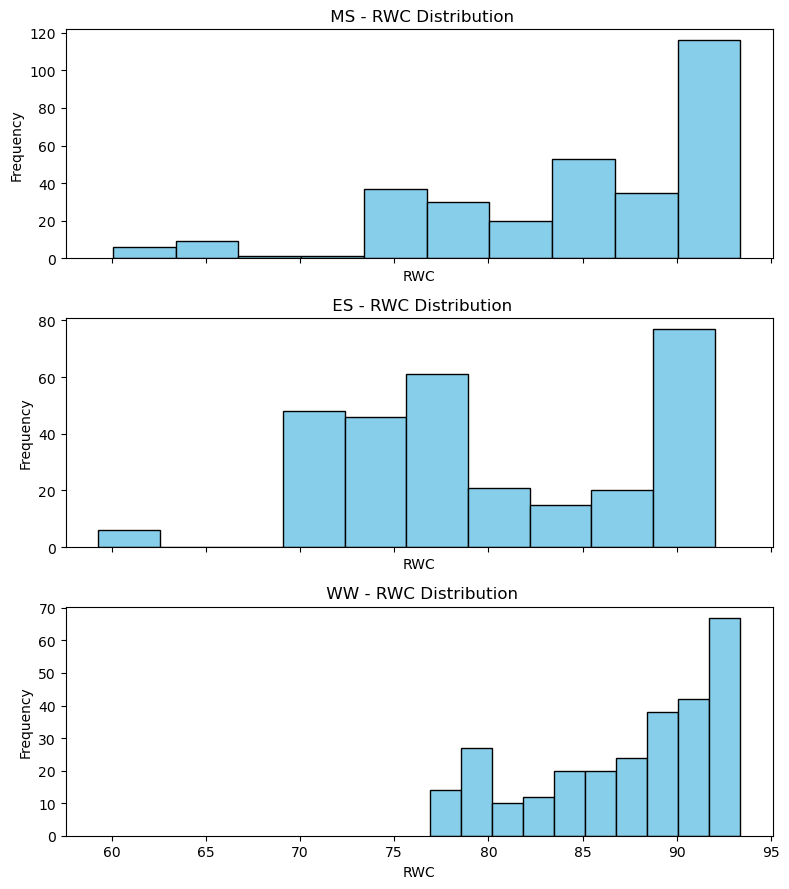

In [24]:
#visualization
class_column='class'
unique_classes = resampledDf[class_column].unique()
    

num_classes = len(unique_classes)
fig, axes = plt.subplots(nrows=num_classes, ncols=1, figsize=(8, 3 * num_classes), sharex=True)

for ax, class_value in zip(axes, unique_classes):

    class_df = resampledDf[resampledDf[class_column] == class_value]
    ax.hist(class_df['RWC'], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(f' {class_value} - RWC Distribution')
    ax.set_xlabel('RWC')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Number of X (876, 447) and Y (876, 2)


Text(0, 0.5, 'Reflectance')

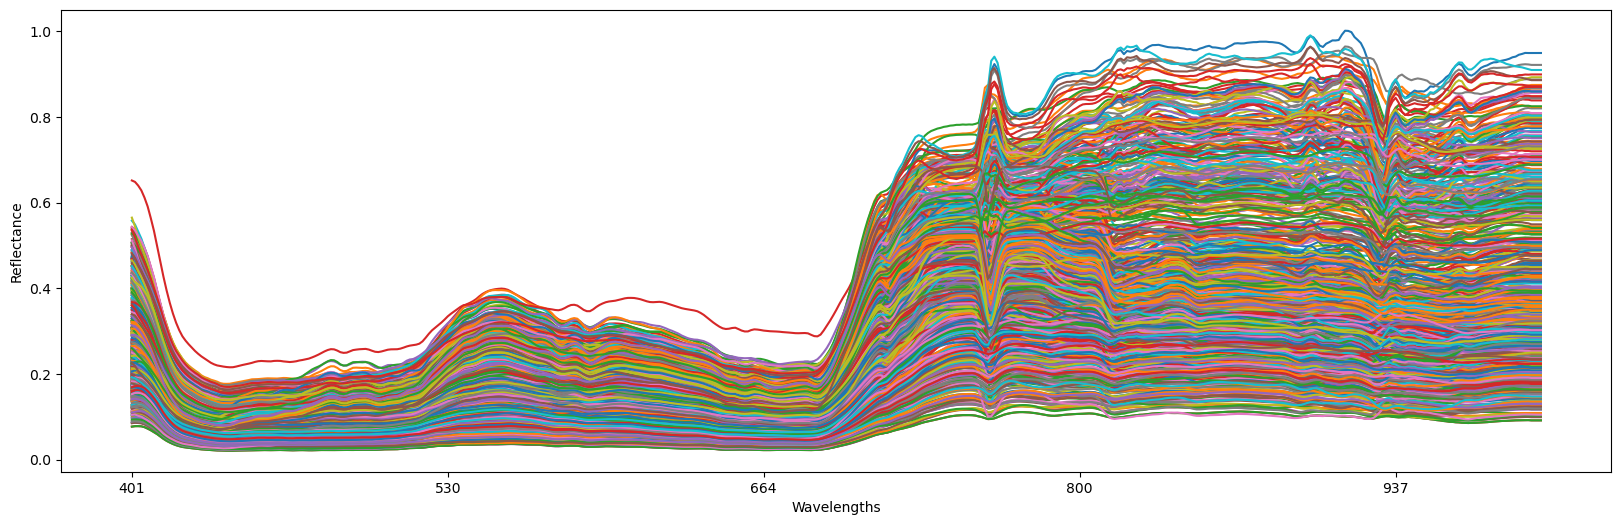

In [20]:
gt=resampledDf.iloc[:,-2:]
reflec=resampledDf.iloc[:,1:-2]
print(f'Number of X {reflec.shape} and Y {gt.shape}')
ax=reflec.iloc[:,:].T.plot(figsize=(20,6),legend=False)
ax.set_xlabel("Wavelengths")
ax.set_ylabel('Reflectance')

In [18]:
resampledDf.dtypes

Sample            int64
401             float64
402             float64
403             float64
404             float64
                 ...   
Unnamed: 451     object
Unnamed: 452    float64
Unnamed: 453    float64
Unnamed: 454    float64
Unnamed: 455    float64
Length: 456, dtype: object

In [31]:
# Assuming 'ID1' and 'ID2' are the names of the ID columns in both datasets
combined_df=pd.read_excel('dataset/combined.xlsx')
LWC_df=pd.read_excel('dataset/LWC.xlsx')
# Merging the datasets on 'ID' and 'Folder' columns
merged_df = pd.merge(combined_df, LWC_df[['ID', 'Folder', 'LWC']], on=['ID', 'Folder'], how='left')

# Display the first few rows of the merged DataFrame to verify the merge
merged_df.head()



,Folder,ImageName,PlantID,ID,class,RWC,Area,MajorAxisLength,MinorAxisLength,Perimeter,...,991,992,994,995,997,998,999,1001,New,LWC
0,April_24_2023,images\VINIR Camera_April_24_2023\VINIR_ROW1_2...,1,511,MS,85.219970,42102,580.242859,203.698044,5224.882813,...,0.159106,0.159111,0.158464,0.158315,0.157802,0.157794,0.157787,0.157793,12.368726,71.092784
1,April_24_2023,images\VINIR Camera_April_24_2023\VINIR_ROW1_2...,2,512,MS,82.250531,130899,890.145691,214.054275,4198.558105,...,0.274651,0.274948,0.274713,0.274892,0.274659,0.274656,0.274651,0.274653,28.932268,65.439189
2,April_24_2023,images\VINIR Camera_April_24_2023\VINIR_ROW1_2...,3,513,MS,89.851064,139212,1039.285767,191.293640,4397.378906,...,0.358459,0.359120,0.359029,0.359286,0.358935,0.358934,0.358933,0.358934,22.977651,66.420258
3,April_24_2023,images\VINIR Camera_April_24_2023\VINIR_ROW1_2...,4,514,MS,84.317560,211283,1078.240234,283.239716,6478.202148,...,0.431412,0.431717,0.430879,0.430823,0.429917,0.429911,0.429906,0.429911,29.763122,66.811280
4,April_24_2023,images\VINIR Camera_April_24_2023\VINIR_ROW1_2...,5,515,MS,87.877907,166700,1027.614502,253.885513,5273.017090,...,0.339505,0.339944,0.339909,0.340081,0.339815,0.339815,0.339812,0.339814,23.747940,64.033044


In [34]:
merged_df.to_csv('dataset/combine_lwc.csv')

In [27]:
combined_df['LWC']=

Index([         'Folder',       'ImageName',         'PlantID',
                    'ID',           'class',             'RWC',
                  'Area', 'MajorAxisLength', 'MinorAxisLength',
             'Perimeter',
       ...
                     990,               991,               992,
                     994,               995,               997,
                     998,               999,              1001,
                   'New'],
      dtype='object', length=483)